Small Notebook that looks at my recent Spotify listening history. 
You can request your listening history by going to your Spotify account and navigating to privacy setting

In [1]:
#%% Imports
import os
from datetime import datetime
from pathlib import Path
import numpy as np
import pandas as pd
import plotly.graph_objects as go


# Data Gathering

In [2]:
MY_SONGS_PKL = r"PreProcessing/PreProcessing_MyData/my_songs_features.pkl"

In [3]:
def gather_streaming_data(pkl_path):
    """
    Accepts .pkl path and returns pandas dataframe of pkl file
    
    Parameters:
    pkl_path (string): path of pkl file to be read
    
    Returns:
    df (pandas datafarme): df of .pkl file
    """
    pkl_path = Path(pkl_path)
    df = pd.read_pickle(pkl_path)
    return df

In [4]:
streaming_df = gather_streaming_data(MY_SONGS_PKL)

In [5]:
streaming_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27373 entries, 0 to 27372
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   endTime           27373 non-null  datetime64[ns]
 1   artistName        27373 non-null  object        
 2   trackName         27373 non-null  object        
 3   minutesPlayed     27373 non-null  float64       
 4   minutesTotal      27373 non-null  float64       
 5   trackId           27373 non-null  object        
 6   danceability      27373 non-null  float64       
 7   energy            27373 non-null  float64       
 8   key               27373 non-null  int64         
 9   loudness          27373 non-null  float64       
 10  mode              27373 non-null  int64         
 11  speechiness       27373 non-null  float64       
 12  acousticness      27373 non-null  float64       
 13  instrumentalness  27373 non-null  float64       
 14  liveness          2737

In [6]:
streaming_df["Date"] = pd.to_datetime(streaming_df["endTime"].dt.date)

In [7]:
streaming_df.head()

,endTime,artistName,trackName,minutesPlayed,minutesTotal,trackId,danceability,energy,key,loudness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,Date
0,2019-09-16 07:09:00,The Growlers,California,0.060100,26.872367,3JgCyIcJPmBVfcgyedU9FV,0.667,0.460,0,-9.738,...,0.437,124.862,audio_features,3JgCyIcJPmBVfcgyedU9FV,spotify:track:3JgCyIcJPmBVfcgyedU9FV,https://api.spotify.com/v1/tracks/3JgCyIcJPmBV...,https://api.spotify.com/v1/audio-analysis/3JgC...,136360,4,2019-09-16
1,2019-09-16 07:09:00,Richard Thompson,1952 Vincent Black Lightning,0.004733,2.934550,1KueOLeUZpaNRK2InckxVT,0.488,0.209,10,-19.549,...,0.362,120.630,audio_features,1KueOLeUZpaNRK2InckxVT,spotify:track:1KueOLeUZpaNRK2InckxVT,https://api.spotify.com/v1/tracks/1KueOLeUZpaN...,https://api.spotify.com/v1/audio-analysis/1Kue...,283493,4,2019-09-16
2,2019-09-16 07:10:00,The Growlers,California,1.190883,26.872367,3JgCyIcJPmBVfcgyedU9FV,0.667,0.460,0,-9.738,...,0.437,124.862,audio_features,3JgCyIcJPmBVfcgyedU9FV,spotify:track:3JgCyIcJPmBVfcgyedU9FV,https://api.spotify.com/v1/tracks/3JgCyIcJPmBV...,https://api.spotify.com/v1/audio-analysis/3JgC...,136360,4,2019-09-16
3,2019-09-16 07:16:00,Dire Straits,Skateaway,6.646000,9.568033,7dRrGFypClyo0iNxSyxpnD,0.523,0.707,7,-12.190,...,0.609,116.196,audio_features,7dRrGFypClyo0iNxSyxpnD,spotify:track:7dRrGFypClyo0iNxSyxpnD,https://api.spotify.com/v1/tracks/7dRrGFypClyo...,https://api.spotify.com/v1/audio-analysis/7dRr...,378960,4,2019-09-16
4,2019-09-16 07:21:00,Doc Robinson,Break My Fall,4.801550,45.732567,652zwAiP1Wdy39NY8DSMu5,0.534,0.419,0,-10.103,...,0.397,76.514,audio_features,652zwAiP1Wdy39NY8DSMu5,spotify:track:652zwAiP1Wdy39NY8DSMu5,https://api.spotify.com/v1/tracks/652zwAiP1Wdy...,https://api.spotify.com/v1/audio-analysis/652z...,288093,4,2019-09-16


# Analysis

Lets have a look at my average listens per day

In [8]:
time_per_day = (
    streaming_df.groupby("Date").sum().sort_values(by="minutesPlayed", ascending=False)
)  # sorting stream data by date and maximum minutes played

busiest_listening_day = (
    time_per_day.idxmax()[0]
).date()  # variable displaying what day that was on

average_listen_per_day = round(time_per_day["minutesPlayed"].mean())

In [9]:
fig = go.Figure(
    data=go.Scatter(
        x=time_per_day.index, y=time_per_day["minutesPlayed"], mode="markers"
    )
)
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Minutes Played")
fig.update_layout(title_text="How much did I listen each day?")
fig.show()

Looks like there was a bit of a lull around February 2020. This was probably because I had just moved and started a new job and wasn't listening in the office as much. 

Let's check if I have a particular day I like to listen on

In [10]:
streaming_df["Day of Week"] = streaming_df["Date"].dt.day_name()
day_order = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]
day_of_week_plays = (
    streaming_df.groupby("Day of Week")
    .sum()
    .sort_values(by="minutesPlayed", ascending=False)
    .reindex(day_order)
)

fig = go.Figure(
    [go.Bar(x=day_of_week_plays.index, y=day_of_week_plays["minutesPlayed"])]
)
fig.update_xaxes(title_text="Day")
fig.update_yaxes(title_text="Minutes Played")
fig.update_layout(title_text="How much did I listen by day of the week?")

fig.show()

Pretty even spread throughout the working week. Saturday and Sundays are less because I'm usually out doing other things than listening to music. 
Let's check monthly habits:

In [11]:
streaming_df["Month"] = streaming_df["endTime"].dt.month_name()
monthly_plays = (
    streaming_df.groupby("Month").sum().sort_values(by="minutesPlayed", ascending=False)
)

fig = go.Figure([go.Bar(x=monthly_plays.index, y=monthly_plays["minutesPlayed"])])
fig.update_xaxes(title_text="Month")
fig.update_yaxes(title_text="Minutes Played")
fig.update_layout(title_text="Plays by month")
fig.show()

So January is my most played month. This might be because Spotify releases lots of curated playlists in the new year to try and broaden your listening. 

Let's check my top 5 played artists by play count and then by total minutes played

In [12]:
#%% Most played artists by play count
most_played_artist_plays = (
    streaming_df.groupby("artistName")
    .count()
    .sort_values(by="trackName", ascending=False)
)


most_played_artist_plays["Play Count"] = most_played_artist_plays["trackName"]
print(most_played_artist_plays["Play Count"][0:5])

fig = go.Figure(
    [
        go.Bar(
            x=most_played_artist_plays["trackName"][0:5],
            y=most_played_artist_plays.index[0:5],
            orientation="h",
        )
    ]
)
fig.update_xaxes(title_text="Play Count")
fig.update_yaxes(title_text="Artist Name")
fig.update_layout(title_text="Most played artists - by play count")
fig.show()

artistName
Tame Impala                1050
The Beatles                 493
Taylor Swift                375
Wolfgang Amadeus Mozart     297
Lana Del Rey                284
Name: Play Count, dtype: int64


In [13]:
#%% Most played artists by total play time
most_played_artist_minutes = (
    streaming_df.groupby("artistName")
    .sum()
    .sort_values(by="minutesPlayed", ascending=False)
)

fig = go.Figure(
    [
        go.Bar(
            x=most_played_artist_minutes["minutesPlayed"][0:5],
            y=most_played_artist_minutes.index[0:5],
            orientation="h",
            marker={
                "color": most_played_artist_minutes["minutesPlayed"][0:5],
                "colorscale": "plasma_r",
            },
        )
    ]
)

fig.update_xaxes(title_text="Minutes Played")
fig.update_yaxes(title_text="Artist Name")
fig.update_layout(title_text="Most played artists - by minutes played")
fig.show()

Let's create a function that spits out the top songs (by play count) for a given artist

In [16]:
def top_songs(artist):
    artist_df = streaming_df[(streaming_df["artistName"].str.contains(artist))]
    top_songs_by_artist = (
        artist_df.groupby("trackName")
        .count()
        .sort_values(by="artistName", ascending=False)
    )
    print(
        f"Your top songs by {artist} are: \n {top_songs_by_artist['minutesPlayed'].head()}"
    )

    fig = go.Figure(
        [
            go.Bar(
                x=top_songs_by_artist["artistName"][0:9],
                y=top_songs_by_artist.index[0:9],
                orientation="h",
                marker={
                    "color": top_songs_by_artist["artistName"][0:9],
                    "colorscale": "plasma_r",
                },
            )
        ]
    )
    fig.update_yaxes(title_text="Track Name")
    fig.update_xaxes(title_text="Song play count")
    fig.update_layout(title_text=f"Most played songs by {artist}")
    fig.show()

Your top songs by Tame Impala are: 
 trackName
Borderline                        63
Breathe Deeper                    49
Solitude Is Bliss                 41
H.f.g.w (Canyons Drunken Rage)    40
Posthumous Forgiveness            34
Name: minutesPlayed, dtype: int64


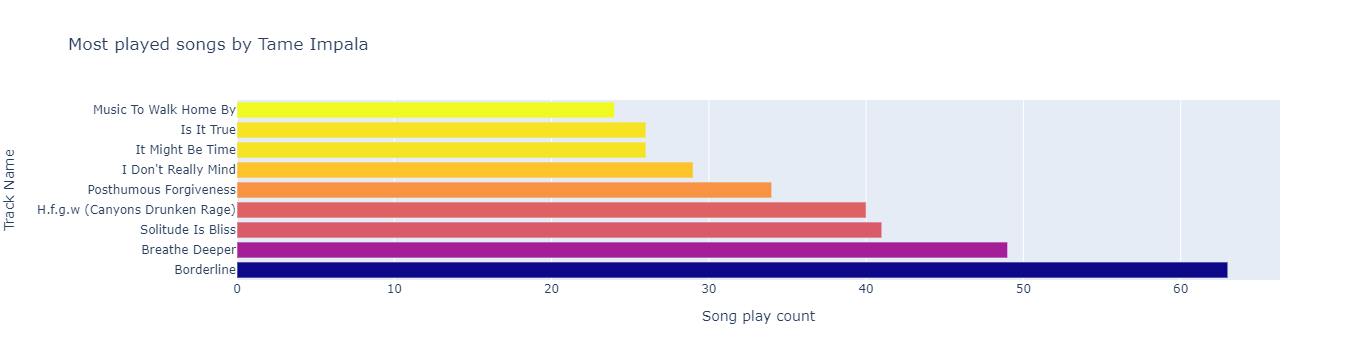

In [17]:
top_songs("Tame Impala")

Let's see what my top played songs are

In [18]:
top_played_songs = (
    streaming_df.groupby("trackName")
    .count()
    .sort_values(by="artistName", ascending=False)
)
top_played_songs_list = top_played_songs.index[0:5].tolist()


def artist_from_song(song):
    artist = (
        streaming_df[(streaming_df["trackName"]).str.contains(song)]["artistName"]
    ).iloc[0]
    return artist


artist_from_song_list = []
for song in top_played_songs_list:
    new_artist = artist_from_song(song)
    artist_from_song_list.append(new_artist)

top_songs = pd.DataFrame(top_played_songs_list, artist_from_song_list)
top_songs.columns = ["Song Name"]

print(f"Your top songs were: \n {top_songs}")

Your top songs were: 
                              Song Name
Tame Impala                 Borderline
Scott McKenzie           San Francisco
Three Dog Night    Never Been To Spain
Tame Impala             Breathe Deeper
Bob Seger        Ramblin' Gamblin' Man


So Tame Impala made it into the top 5 twice! The other songs are James- specific one hit wonders however. 

I would like to see to which artists I listen to a variety of songs, vs just a couple of the same songs over and over. To do this I'm going to count the number of songs I've listened to by a particular artist at least 5 times. 

In [19]:
def unique_songs_by_artist(artist2):
    filter_artist = streaming_df[
        (streaming_df["artistName"].str.contains(artist2))
    ]  # filter by the selected artist

    song_count = (
        filter_artist.groupby("trackName")
        .count()
        .sort_values(by="Date", ascending=False)
    )  # group by that srtists songs

    song_variety = song_count.where(
        song_count["Date"] >= 5
    ).dropna()  # only keep tracks that ive played >= 5 times

    song_variety_count = len(song_variety)  # length of previous series

    print(
        f"You've listened to {song_variety_count} unique songs by {artist2} at least 5 times!"
    )

    return song_variety_count

In [20]:
unique_songs_by_artist("Tame Impala")
unique_songs_by_artist("Bob Seger")
unique_songs_by_artist("The Beatles")

You've listened to 71 unique songs by Tame Impala at least 5 times!
You've listened to 2 unique songs by Bob Seger at least 5 times!
You've listened to 28 unique songs by The Beatles at least 5 times!


28

So which of my Top artists do I also listen to a variety of songs from?

You've listened to 71 unique songs by Tame Impala at least 5 times!
You've listened to 28 unique songs by The Beatles at least 5 times!
You've listened to 27 unique songs by Taylor Swift at least 5 times!
You've listened to 13 unique songs by Wolfgang Amadeus Mozart at least 5 times!
You've listened to 14 unique songs by Lana Del Rey at least 5 times!


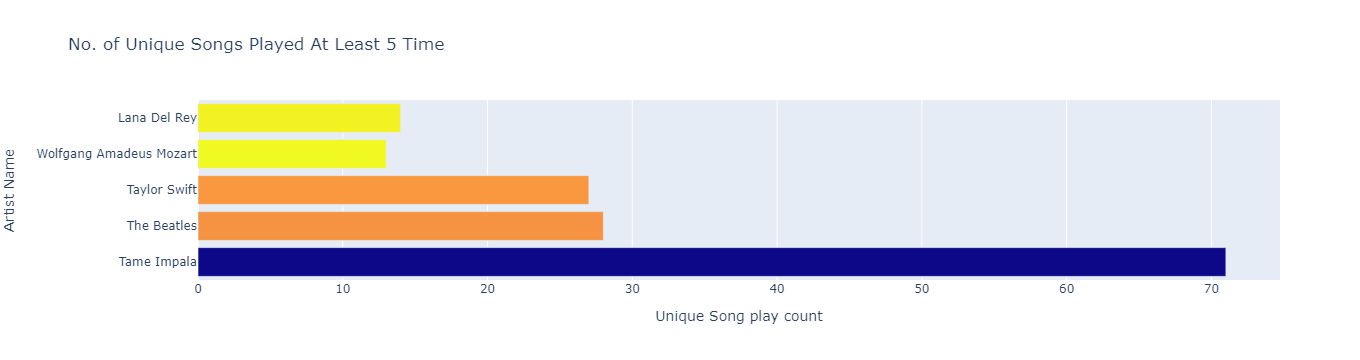

In [21]:
#%% Which of my top artists do I listen to a variety of songs from?
# most_artist_plays is variable from earlier that contains my top played artists by play count

most_played_artist_plays_list = most_played_artist_plays[0:5].index.tolist()

unique_songs_by_top_artist_list = []
for artists in most_played_artist_plays_list:
    unique_songs_by_that_artist = unique_songs_by_artist(artists)
    unique_songs_by_top_artist_list.append(unique_songs_by_that_artist)

unique_songs_df = pd.DataFrame(
    unique_songs_by_top_artist_list, most_played_artist_plays_list
)
unique_songs_df.columns = ["No. of Unique Songs Played At Least 5 Times"]

fig = go.Figure(
    [
        go.Bar(
            x=unique_songs_df["No. of Unique Songs Played At Least 5 Times"],
            y=unique_songs_df.index,
            orientation="h",
            marker={
                "color": unique_songs_df["No. of Unique Songs Played At Least 5 Times"],
                "colorscale": "plasma_r",
            },
        )
    ]
)

fig.update_yaxes(title_text="Artist Name")
fig.update_xaxes(title_text="Unique Song play count")
fig.update_layout(title_text="No. of Unique Songs Played At Least 5 Time")
fig.show()